**Dissolved Oxygen**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt


data = pd.read_csv('../Pretreated data.csv')
data.head()
# Load the dataset and prepare the data
do = data[['date', 'DO(mg/l)']]
do = do.set_index('date')

# Step 1: ADF test on the original data
adf_result = adfuller(do['DO(mg/l)'])
print(f'ADF Statistic (original): {adf_result[0]}')
print(f'p-value (original): {adf_result[1]}')

# Step 2: Apply differencing
do_diff = do['DO(mg/l)'].diff().dropna()

# Step 3: ADF test on the differenced data
adf_result_diff = adfuller(do_diff)
print(f'ADF Statistic (differenced): {adf_result_diff[0]}')
print(f'p-value (differenced): {adf_result_diff[1]}')

ADF Statistic (original): -7.971149647083841
p-value (original): 2.7790848183701384e-12
ADF Statistic (differenced): -20.314002445102254
p-value (differenced): 0.0


(0.0, 10.0)

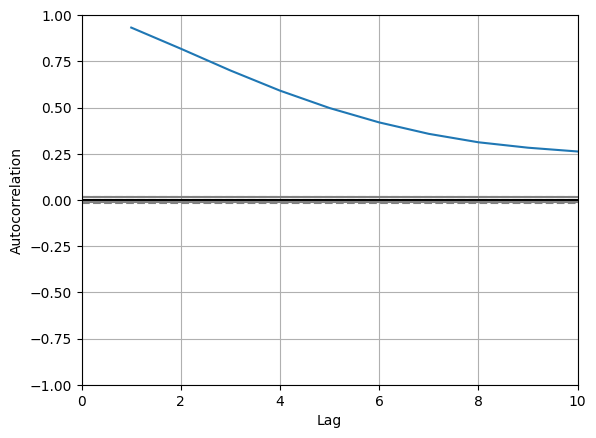

In [4]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(do_diff).set_xlim([0, 10])

Iter=0, predicted=2.770773, expected=2.765549
Iter=1, predicted=2.734105, expected=2.726125
Iter=2, predicted=2.688021, expected=2.680662
Iter=3, predicted=2.637034, expected=2.627731
Iter=4, predicted=2.576739, expected=2.572516
Iter=5, predicted=2.521612, expected=2.525908
Iter=6, predicted=2.487084, expected=2.505704
Iter=7, predicted=2.497757, expected=2.498652
Iter=8, predicted=2.496603, expected=2.501476
Iter=9, predicted=2.507578, expected=2.502888
Iter=10, predicted=2.503226, expected=2.503594
Iter=11, predicted=2.504002, expected=2.503947
Iter=12, predicted=2.504151, expected=2.504123
Iter=13, predicted=2.504225, expected=2.504212
Iter=14, predicted=2.504263, expected=2.504256
Iter=15, predicted=2.504281, expected=2.504278
Iter=16, predicted=2.504291, expected=2.504289
Iter=17, predicted=2.504295, expected=2.504294
Iter=18, predicted=2.504298, expected=2.509447
Iter=19, predicted=2.516236, expected=2.515624
Iter=20, predicted=2.521469, expected=2.522862
Iter=21, predicted=2.52

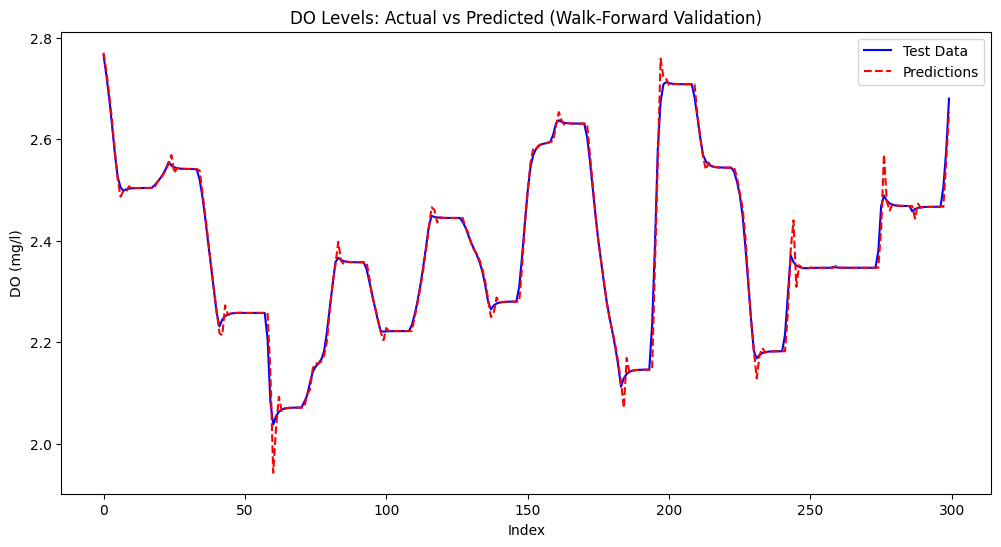

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


# Best Parameters: {'d': 0, 'p': 4, 'q': 18, 'trend': 'ct'}
# Best Loss: 0.00041905043113688603
# Load the dataset and prepare the data
data = pd.read_csv('../Pretreated data.csv')
do = data[['date', 'DO(mg/l)']]
do = do.set_index('date')

# Splitting the data: 98.5% train, 1.5% test
size = int(len(do) * 0.985)
train, test = do[0:size], do[size:len(do)]
history = [x for x in train['DO(mg/l)']]  # Extract the DO column data for history
predictions = list()

# Fit ARIMA model once on the training data
model = ARIMA(history, order=(3, 1, 0))  # Adjust order as needed
model_fit = model.fit()

# Walk-forward validation with rolling predictions
for t in range(len(test)):
    # Forecast using the model (without re-fitting)
    output = model_fit.forecast(steps=1)
    yhat = output[0]
    predictions.append(yhat)

    # Update history with the actual observation
    obs = test['DO(mg/l)'].iloc[t]
    history.append(obs)  # Update the history

    # Re-initialize the model with updated history to update forecast
    model_fit = model_fit.append([obs], refit=False)

    print(f'Iter={t}, predicted={yhat:.6f}, expected={obs:.6f}')

# Evaluation metrics
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mape = np.mean(np.abs((test['DO(mg/l)'] - predictions) / test['DO(mg/l)'])) * 100

# Print metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Reset index for proper plotting
test = test.reset_index(drop=True)

# Plot the test data and predictions using numeric index
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Test Data', color='blue')
plt.plot(test.index, predictions, label='Predictions', color='red', linestyle='--')
plt.title('DO Levels: Actual vs Predicted (Walk-Forward Validation)')
plt.xlabel('Index')
plt.ylabel('DO (mg/l)')
plt.legend()
plt.show()


**TEMPERATURE**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example: Assuming 'data' is your DataFrame containing the time series data (DO levels)
# data['DO(mg/l)'] should be the column you are analyzing
# First, perform differencing
differenced_Tdata = (data['Temp(degC)'].diff().dropna())

# # Plot ACF and PACF for the differenced data
# plt.figure(figsize=(12, 6))

# # ACF plot
# plt.subplot(121)
# plot_acf(differenced_Tdata, lags=50, ax=plt.gca())
# plt.title('ACF of Differenced Data')

# # PACF plot
# plt.subplot(122)
# plot_pacf(differenced_Tdata, lags=50, ax=plt.gca())
# plt.title('PACF of Differenced Data')

# plt.tight_layout()
# plt.show()

# (26,1,0)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset and prepare the data
tem = data[['date', 'Temp(degC)']]
tem = tem.set_index('date')

(0.0, 20.0)

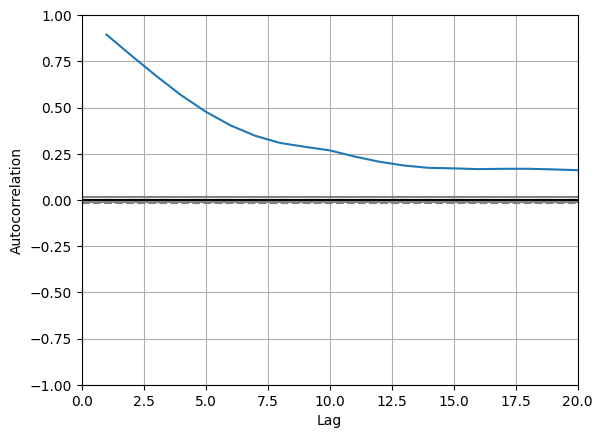

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(differenced_Tdata).set_xlim([0, 20])

Iter=0, predicted=27.507450, expected=27.507421
Iter=1, predicted=27.507474, expected=27.507460
Iter=2, predicted=27.507486, expected=27.507479
Iter=3, predicted=27.507493, expected=27.507489
Iter=4, predicted=27.507496, expected=27.507494
Iter=5, predicted=27.507497, expected=27.505000
Iter=6, predicted=27.502560, expected=27.511000
Iter=7, predicted=27.516995, expected=27.513000
Iter=8, predicted=27.514772, expected=27.513000
Iter=9, predicted=27.512613, expected=27.516000
Iter=10, predicted=27.518839, expected=27.518000
Iter=11, predicted=27.519805, expected=27.517000
Iter=12, predicted=27.515778, expected=27.517000
Iter=13, predicted=27.516955, expected=27.518000
Iter=14, predicted=27.519026, expected=27.520000
Iter=15, predicted=27.521906, expected=27.525000
Iter=16, predicted=27.529742, expected=27.531000
Iter=17, predicted=27.536521, expected=27.535000
Iter=18, predicted=27.538371, expected=27.539000
Iter=19, predicted=27.542425, expected=27.543000
Iter=20, predicted=27.546520, 

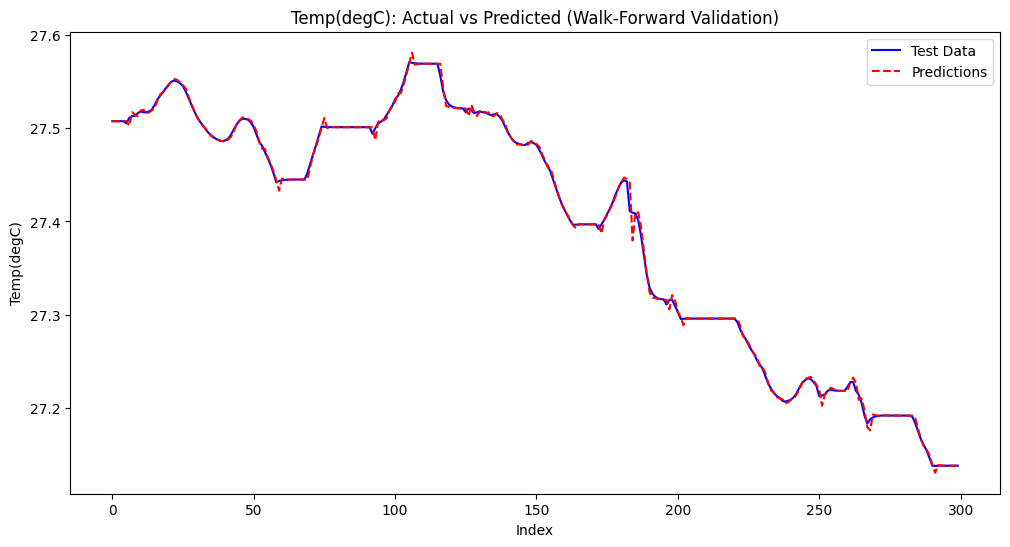

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


# Splitting the data: 98.5% train, 1.5% test
size = int(len(tem) * 0.985)
train, test = tem[0:size], tem[size:len(tem)]
history = [x for x in train['Temp(degC)']]  # Extract the temperature column data for history
predictions = list()

# Fit ARIMA model once on the training data
model = ARIMA(history, order=(3, 1, 0))  # Adjust order as needed
model_fit = model.fit()

# Walk-forward validation with rolling predictions
for t in range(len(test)):
    # Forecast using the model (without re-fitting)
    output = model_fit.forecast(steps=1)
    yhat = output[0]
    predictions.append(yhat)

    # Update history with the actual observation
    obs = test['Temp(degC)'].iloc[t]
    history.append(obs)  # Update the history

    # Re-initialize the model with updated history to update forecast
    model_fit = model_fit.append([obs], refit=False)

    print(f'Iter={t}, predicted={yhat:.6f}, expected={obs:.6f}')

# Evaluation metrics
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mape = np.mean(np.abs((test['Temp(degC)'] - predictions) / test['Temp(degC)'])) * 100

# Print metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Reset index for proper plotting
test = test.reset_index(drop=True)

# Plot the test data and predictions using numeric index
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Test Data', color='blue')
plt.plot(test.index, predictions, label='Predictions', color='red', linestyle='--')
plt.title('Temp(degC): Actual vs Predicted (Walk-Forward Validation)')
plt.xlabel('Index')
plt.ylabel('Temp(degC)')
plt.legend()
plt.show()
